### **Initialization**

*   **Setting up Fast.ai Environment**
*   I am doing this project on Google Colab using [Fast.ai](https://www.fast.ai/about/) Library. Uncomment the cell below to initialize the Fast.ai on your Google Colab.

**Fastai is the first deep learning library to provide a single consistent interface to all the most commonly used deep learning applications for vision, text, tabular data, time series, and collaborative filtering.**

In [17]:
# !curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


*I always keep these 3 lines on top of my Notebook, so that it won't create any problem in loading my Notebook again and again.*

In [18]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

**Downloading the Dependencies**

In [19]:
from fastai import *
from fastai.vision import *

**Getting the Data**

*Fastai has its own [Dataset](https://docs.fast.ai/datasets.html) sample inorder to make it more handy and easier to work on. But the Datasets are limited and you can only get the Data which has been included in its Dataset using the code written in following cell. Otherwise you should get your own Data.*

In [20]:
# Uncomment the Line below to read the Documentation, to access to the Source Code and to know what does untar_data actually do.
# doc(untar_data)

In [21]:
path = untar_data(URLs.MNIST)
path.ls()

[PosixPath('/content/data/mnist_png/testing'),
 PosixPath('/content/data/mnist_png/training')]

In [22]:
# If you get confused about any function in this Notebook, I recommend you to do doc(function_name) and try to learn it.
# Uncomment the Line below to know about ImageList
# doc(ImageList)

**Creating the ImageList**

In [23]:
il = ImageList.from_folder(path, convert_mode="L")
il.items[0]

PosixPath('/content/data/mnist_png/testing/9/9292.png')

*Since, the Images are basically in RGB, I want to set the Colormap to default Binary. It can be done in Fastai using the following line of code.*

In [24]:
defaults.cmap = "binary"

In [25]:
il

ImageList (70000 items)
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
Path: /content/data/mnist_png

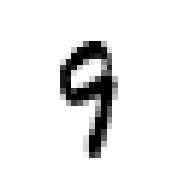

In [26]:
il[0].show()

*Splitting the ImageList into Training Set and Validation Set. Here in MNIST Dataset, The Validation set is in training folder.*

In [27]:
sd = il.split_by_folder(train="training", valid="testing")
sd

ItemLists;

Train: ImageList (60000 items)
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
Path: /content/data/mnist_png;

Valid: ImageList (10000 items)
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
Path: /content/data/mnist_png;

Test: None

In [28]:
(path/"training").ls()

[PosixPath('/content/data/mnist_png/training/9'),
 PosixPath('/content/data/mnist_png/training/4'),
 PosixPath('/content/data/mnist_png/training/0'),
 PosixPath('/content/data/mnist_png/training/6'),
 PosixPath('/content/data/mnist_png/training/2'),
 PosixPath('/content/data/mnist_png/training/7'),
 PosixPath('/content/data/mnist_png/training/5'),
 PosixPath('/content/data/mnist_png/training/8'),
 PosixPath('/content/data/mnist_png/training/1'),
 PosixPath('/content/data/mnist_png/training/3')]

In [29]:
ll = sd.label_from_folder()
ll

LabelLists;

Train: LabelList (60000 items)
x: ImageList
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
y: CategoryList
9,9,9,9,9
Path: /content/data/mnist_png;

Valid: LabelList (10000 items)
x: ImageList
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
y: CategoryList
9,9,9,9,9
Path: /content/data/mnist_png;

Test: None

In [30]:
x, y = ll.train[0]

9 torch.Size([1, 28, 28])


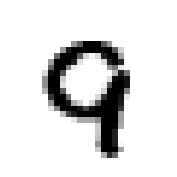

In [31]:
x.show()
print(y, x.shape)

*Now, Transforming the ImageData.The empty List in the code below is for Validation set which refers to the no transformation for Validation set.*

In [32]:
tfms = ([*rand_pad(padding=3, size=28, mode="zeros")], [])

In [33]:
ll.transform(tfms)

LabelLists;

Train: LabelList (60000 items)
x: ImageList
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
y: CategoryList
9,9,9,9,9
Path: /content/data/mnist_png;

Valid: LabelList (10000 items)
x: ImageList
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
y: CategoryList
9,9,9,9,9
Path: /content/data/mnist_png;

Test: None

**Creating the DataBunch**

*Here, I am not using the Pre-trained Model*

In [34]:
bs = 128
data = ll.databunch(bs=bs).normalize()

In [35]:
x, y = data.train_ds[0]

9


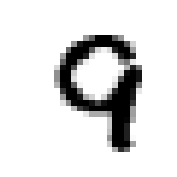

In [36]:
x.show()
print(y)

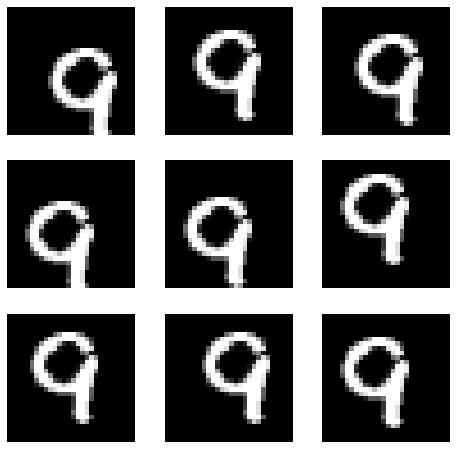

In [37]:
def _plot(i, j, ax):
  data.train_ds[0][0].show(ax, cmap="gray")

plot_multi(_plot, 3, 3, figsize=(8, 8))

In [38]:
xb, yb = data.one_batch()
xb.shape, yb.shape

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

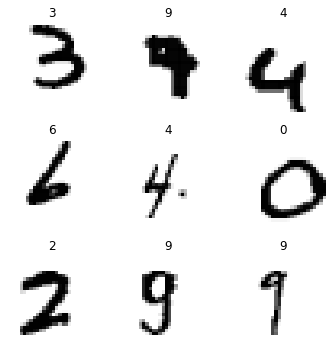

In [39]:
data.show_batch(rows=3, figsize=(5, 5))

### **Convolutional Neural Network**

In [40]:
def conv(ni, nf):
  return nn.Conv2d(ni, nf, kernel_size=3, stride=2, padding=1)

In [42]:
model = nn.Sequential(
    conv(1, 8),
    nn.BatchNorm2d(8),
    nn.ReLU(),
    conv(8, 16),
    nn.BatchNorm2d(16),
    nn.ReLU(),
    conv(16, 32),
    nn.BatchNorm2d(32),
    nn.ReLU(),
    conv(32, 16),
    nn.BatchNorm2d(16),
    nn.ReLU(),
    conv(16, 10),
    nn.BatchNorm2d(10),
    nn.Flatten()
)

In [44]:
learn = Learner(data, model, loss_func=nn.CrossEntropyLoss(), metrics=accuracy)

In [45]:
print(learn.summary())

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [8, 14, 14]          80         True      
______________________________________________________________________
BatchNorm2d          [8, 14, 14]          16         True      
______________________________________________________________________
ReLU                 [8, 14, 14]          0          False     
______________________________________________________________________
Conv2d               [16, 7, 7]           1,168      True      
______________________________________________________________________
BatchNorm2d          [16, 7, 7]           32         True      
______________________________________________________________________
ReLU                 [16, 7, 7]           0          False     
______________________________________________________________________
Conv2d               [32, 4, 4]           4,640      True      
___________________________________________________

In [46]:
xb = xb.cuda()

In [47]:
model(xb).shape

torch.Size([128, 10])

In [48]:
learn.lr_find(end_lr=100)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


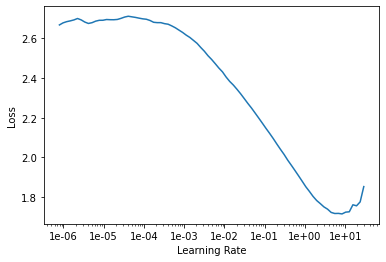

In [49]:
learn.recorder.plot()

In [50]:
learn.fit_one_cycle(3, max_lr=1e-01)

epoch,train_loss,valid_loss,accuracy,time
0,0.233280,0.204498,0.938600,00:26
1,0.135092,0.093867,0.971500,00:26
2,0.074173,0.037839,0.988400,00:25


**Refractor**
- **Using Fast.ai API**

In [68]:
def conv2(ni, nf):
  return conv_layer(ni, nf, stride=2)

In [69]:
model = nn.Sequential(
    conv2(1, 8),
    conv2(8, 16),
    conv2(16, 32),
    conv2(32, 16),
    conv2(16, 10),
    Flatten()
)

In [70]:
learn = Learner(data, model, loss_func=nn.CrossEntropyLoss(), metrics=accuracy)

In [71]:
learn.fit_one_cycle(10, max_lr=1e-01)

epoch,train_loss,valid_loss,accuracy,time
0,0.239112,0.140341,0.956400,00:25
1,0.179521,0.171291,0.944200,00:25
2,0.160846,0.110121,0.964000,00:25
3,0.134613,0.244893,0.929100,00:25
4,0.124248,0.111974,0.962900,00:25
5,0.104492,0.064326,0.979400,00:25
6,0.072862,0.042041,0.986000,00:25
7,0.066830,0.033925,0.989300,00:25
8,0.046476,0.027948,0.990800,00:26
9,0.047367,0.026780,0.991400,00:25


### **ResNet**
- **Using Fast.ai's ResNet API**

In [72]:
# Uncomment the following Line of Code to know res_block API
# help(res_block)

In [73]:
def conv_and_res(ni, nf):
  return nn.Sequential(conv2(ni, nf), res_block(nf))

In [74]:
model = nn.Sequential(
    conv_and_res(1, 8),
    conv_and_res(8, 16),
    conv_and_res(16, 32),
    conv_and_res(32, 16),
    conv_and_res(16, 10),
    Flatten()
)

In [75]:
learn = Learner(data, model, loss_func=nn.CrossEntropyLoss(), metrics=accuracy)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


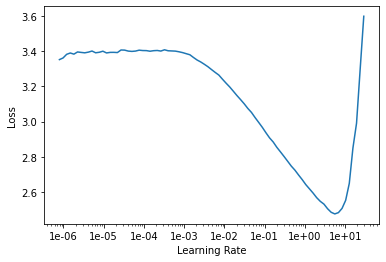

In [76]:
learn.lr_find(end_lr=100)
learn.recorder.plot()

In [77]:
learn.fit_one_cycle(10, max_lr=0.5)

epoch,train_loss,valid_loss,accuracy,time
0,0.215749,0.195617,0.938300,00:29
1,0.214731,0.562309,0.837900,00:29
2,0.208107,0.270378,0.923000,00:29
3,0.204456,0.279376,0.915100,00:29
4,0.168779,0.123894,0.962100,00:29
5,0.145539,0.238507,0.936500,00:29
6,0.114442,0.233971,0.927300,00:29
7,0.080748,0.068324,0.978900,00:29
8,0.039997,0.027292,0.991400,00:29
9,0.032204,0.021025,0.993400,00:29


In [78]:
print(learn.summary())

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [8, 14, 14]          72         True      
______________________________________________________________________
ReLU                 [8, 14, 14]          0          False     
______________________________________________________________________
BatchNorm2d          [8, 14, 14]          16         True      
______________________________________________________________________
Conv2d               [8, 14, 14]          576        True      
______________________________________________________________________
ReLU                 [8, 14, 14]          0          False     
______________________________________________________________________
BatchNorm2d          [8, 14, 14]          16         True      
______________________________________________________________________
Conv2d               [8, 14, 14]          576        True      
___________________________________________________

In [79]:
learn.save("Model")